In [7]:

import pandas as pd
from pytubefix import YouTube

In [10]:
def get_video_duration(video_id: str) -> float:
    yt = YouTube.from_id(video_id)
    duration = yt.length
    return duration


In [3]:
report_path = "/home/vedant/Desktop/glimpsify/most_info_frame_extractor/experiments/28/evaluation_report_prominent_peaks_v4.csv"
internal_id_to_video_id_mapping = "/home/vedant/Desktop/glimpsify/most_info_frame_extractor/experiments/25/internal_id_to_video_id_df.csv"

report_df = pd.read_csv(report_path)
mapping_df = pd.read_csv(internal_id_to_video_id_mapping)

report_df.set_index("internal_id", inplace=True)
mapping_df.set_index("internal_id", inplace=True)

In [4]:
report_df.shape

(85, 7)

In [6]:
expanded_report_df = report_df.join(mapping_df)
expanded_report_df.head()

,num_of_duplicates,num_of_missing_key_frames,num_of_non_key_frames,generated_pdf_key_frame_count,reference_pdf_key_frame_count,accuracy,similarity_score,Unnamed: 0,video_id,video_name
internal_id,,,,,,,,,,
meatkb,4,37,111,116,38,0.026316,0.006711,54,pI54QMfexuU,Three Stages of the Writing Process|Essay Writ...
htvpfe,0,2,1,4,5,0.600000,0.500000,91,KjkOGTYtCs0,Orthodontic Tooth Movement- Biomechanics- Dura...
wnhdmj,0,13,2,11,22,0.409091,0.375000,59,cqoOAz8i6nI,Head & Neck Anatomy | Muscles of Facial Expres...
fxddqo,0,5,0,4,9,0.444444,0.444444,115,Q1U1rOO6t4I,Oral Surgery | Trauma & Orthognathic Surgery |...
adwxvg,0,3,2,8,9,0.666667,0.545455,83,7EsHL8Sacg0,Endodontics | Pulp Biology and Tooth Pain | IN...


In [11]:
expanded_report_df["duration"] = expanded_report_df["video_id"].apply(get_video_duration)
expanded_report_df.head()

,num_of_duplicates,num_of_missing_key_frames,num_of_non_key_frames,generated_pdf_key_frame_count,reference_pdf_key_frame_count,accuracy,similarity_score,Unnamed: 0,video_id,video_name,duration
internal_id,,,,,,,,,,,
meatkb,4,37,111,116,38,0.026316,0.006711,54,pI54QMfexuU,Three Stages of the Writing Process|Essay Writ...,3415
htvpfe,0,2,1,4,5,0.600000,0.500000,91,KjkOGTYtCs0,Orthodontic Tooth Movement- Biomechanics- Dura...,358
wnhdmj,0,13,2,11,22,0.409091,0.375000,59,cqoOAz8i6nI,Head & Neck Anatomy | Muscles of Facial Expres...,626
fxddqo,0,5,0,4,9,0.444444,0.444444,115,Q1U1rOO6t4I,Oral Surgery | Trauma & Orthognathic Surgery |...,860
adwxvg,0,3,2,8,9,0.666667,0.545455,83,7EsHL8Sacg0,Endodontics | Pulp Biology and Tooth Pain | IN...,1006


In [12]:
expanded_report_df.columns

Index(['num_of_duplicates', 'num_of_missing_key_frames',
       'num_of_non_key_frames', 'generated_pdf_key_frame_count',
       'reference_pdf_key_frame_count', 'accuracy', 'similarity_score',
       'Unnamed: 0', 'video_id', 'video_name', 'duration'],
      dtype='object')

Video count by duration category:
duration_category
< 10 minutes     10
10-20 minutes    33
20-40 minutes    28
40-50 minutes     4
> 50 minutes     13
Name: count, dtype: int64

Average metrics by duration category:
                   accuracy  similarity_score  num_of_duplicates  \
duration_category                                                  
< 10 minutes       0.507143          0.425480           0.100000   
10-20 minutes      0.494068          0.425905           0.757576   
20-40 minutes      0.543697          0.423653           2.107143   
40-50 minutes      0.531754          0.322906          23.000000   
> 50 minutes       0.495324          0.361230          15.230769   

                   num_of_missing_key_frames  num_of_non_key_frames  
duration_category                                                    
< 10 minutes                        3.500000               1.700000  
10-20 minutes                       6.242424               2.090909  
20-40 minutes             

/tmp/ipykernel_28190/373048580.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_metrics = expanded_report_df.groupby('duration_category')[metrics].mean()


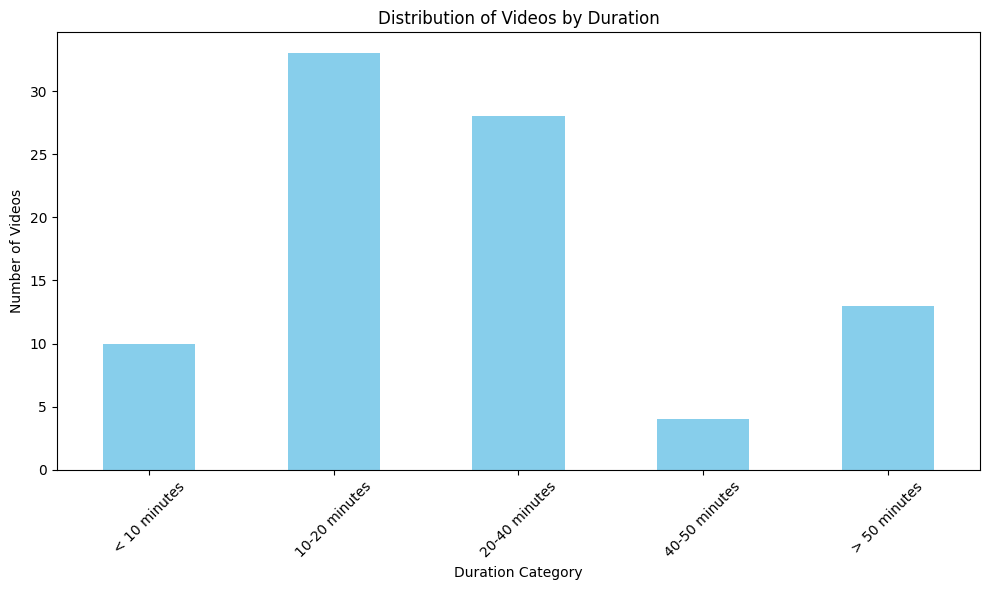

<Figure size 1000x600 with 0 Axes>

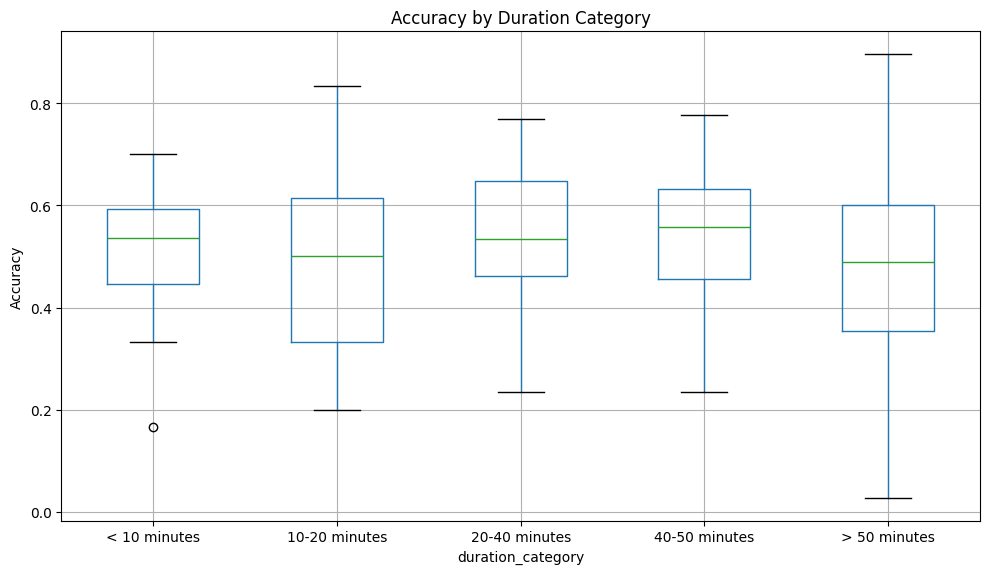

In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming expanded_report_df is your DataFrame
# First, create the bins
bins = [0, 600, 1200, 2400, 3000, float('inf')]
labels = ['< 10 minutes', '10-20 minutes', '20-40 minutes', '40-50 minutes', '> 50 minutes']

# Add a new column with the duration bins
expanded_report_df['duration_category'] = pd.cut(expanded_report_df['duration'],
                                                bins=bins,
                                                labels=labels,
                                                right=False)

# Display the count of videos in each bin
duration_counts = expanded_report_df['duration_category'].value_counts().sort_index()
print("Video count by duration category:")
print(duration_counts)

# Calculate mean metrics for each duration category
metrics = ['accuracy', 'similarity_score', 'num_of_duplicates',
           'num_of_missing_key_frames', 'num_of_non_key_frames']

# Group by duration category and calculate mean for each metric
grouped_metrics = expanded_report_df.groupby('duration_category')[metrics].mean()
print("\nAverage metrics by duration category:")
print(grouped_metrics)

# Optional: Create a visualization of the distribution
plt.figure(figsize=(10, 6))
duration_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Videos by Duration')
plt.xlabel('Duration Category')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: To analyze the relationship between duration and a specific metric
# Example: Plot how accuracy varies with duration category
plt.figure(figsize=(10, 6))
expanded_report_df.boxplot(column='accuracy', by='duration_category', figsize=(10, 6))
plt.title('Accuracy by Duration Category')
plt.suptitle('')  # Remove the automatic suptitle
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [16]:
expanded_report_df.head()


,num_of_duplicates,num_of_missing_key_frames,num_of_non_key_frames,generated_pdf_key_frame_count,reference_pdf_key_frame_count,accuracy,similarity_score,Unnamed: 0,video_id,video_name,duration,duration_category
internal_id,,,,,,,,,,,,
meatkb,4,37,111,116,38,0.026316,0.006711,54,pI54QMfexuU,Three Stages of the Writing Process|Essay Writ...,3415,> 50 minutes
htvpfe,0,2,1,4,5,0.600000,0.500000,91,KjkOGTYtCs0,Orthodontic Tooth Movement- Biomechanics- Dura...,358,< 10 minutes
wnhdmj,0,13,2,11,22,0.409091,0.375000,59,cqoOAz8i6nI,Head & Neck Anatomy | Muscles of Facial Expres...,626,10-20 minutes
fxddqo,0,5,0,4,9,0.444444,0.444444,115,Q1U1rOO6t4I,Oral Surgery | Trauma & Orthognathic Surgery |...,860,10-20 minutes
adwxvg,0,3,2,8,9,0.666667,0.545455,83,7EsHL8Sacg0,Endodontics | Pulp Biology and Tooth Pain | IN...,1006,10-20 minutes


In [20]:
under_40_df = expanded_report_df[expanded_report_df['duration'] < 2400]
under_40_df.head()

,num_of_duplicates,num_of_missing_key_frames,num_of_non_key_frames,generated_pdf_key_frame_count,reference_pdf_key_frame_count,accuracy,similarity_score,Unnamed: 0,video_id,video_name,duration,duration_category
internal_id,,,,,,,,,,,,
htvpfe,0,2,1,4,5,0.600000,0.500000,91,KjkOGTYtCs0,Orthodontic Tooth Movement- Biomechanics- Dura...,358,< 10 minutes
wnhdmj,0,13,2,11,22,0.409091,0.375000,59,cqoOAz8i6nI,Head & Neck Anatomy | Muscles of Facial Expres...,626,10-20 minutes
fxddqo,0,5,0,4,9,0.444444,0.444444,115,Q1U1rOO6t4I,Oral Surgery | Trauma & Orthognathic Surgery |...,860,10-20 minutes
adwxvg,0,3,2,8,9,0.666667,0.545455,83,7EsHL8Sacg0,Endodontics | Pulp Biology and Tooth Pain | IN...,1006,10-20 minutes
yaldqc,2,11,4,18,23,0.521739,0.444444,49,_e_B8rTl_rU,Pediatric Dentistry | Developmental Disturbanc...,1644,20-40 minutes


In [26]:
under_40_df.describe()
under_40_df.sort_values(by="accuracy", ascending=True)

,num_of_duplicates,num_of_missing_key_frames,num_of_non_key_frames,generated_pdf_key_frame_count,reference_pdf_key_frame_count,accuracy,similarity_score,Unnamed: 0,video_id,video_name,duration,duration_category
internal_id,,,,,,,,,,,,
obwxrn,0,5,3,4,6,0.166667,0.111111,8,EHzEbKDgeRU,Oral Pathology | Mucosal Malignant Lesions | I...,314,< 10 minutes
gxtjwd,0,8,6,8,10,0.200000,0.125000,28,SZFqei91R9w,Oral Radiology | Film vs. Digital Imaging | IN...,660,10-20 minutes
pdddxw,1,13,11,16,17,0.235294,0.142857,43,PnBGIMJeCQ0,"Orthodontics | PRACTICE QUESTIONS | INBDE, ADA...",1840,20-40 minutes
cftulg,0,12,10,15,17,0.294118,0.185185,72,klcJZEHK_q8,Operative Dentistry | PRACTICE QUESTIONS | INB...,1768,20-40 minutes
lxwqhv,2,14,1,9,20,0.300000,0.285714,19,9GmySN5P408,Orthodontic Tooth Movement- Biomechanics- Type...,886,10-20 minutes
...,...,...,...,...,...,...,...,...,...,...,...,...
lhopxd,0,3,1,9,11,0.727273,0.666667,24,QihnP-ajxBI,"Prosthodontics | Support, Stability, & Retenti...",694,10-20 minutes
vvywdg,18,5,28,60,19,0.736842,0.297872,77,dC93OcrNX6c,Chapter 35 Innate Immunity.mp4,1772,20-40 minutes
hhboxg,1,3,2,13,13,0.769231,0.666667,67,MLmLr0KW3f0,Oral Medicine | Diabetes | INBDE.mp4,1865,20-40 minutes
